# Application of Machine Learning on Employee Profiling Analysis
## Problem Background
Employees in a company can be diverse in background and interest.Knowing employees helps the management team to understand their needs and expectations from the organization. This helps to adjust management strategies according to the needs and interest. 

Good management strategies motivate employees to spare no effort in executing daily tasks and be postitive. Most importantly , it helps to retain talents in the organization.Otherwise,improper management strategies can lead to dissapointments and lose of employee. 

Therefore,understanding employees in a organization is crucial but yet a challenging task.

Machine Learning is defined by Mitchell (1997) as the study of computer algorithms that improve automatically through experience. [3] Machine learning comes to our sight in the recent decades with its ease and high performance. It has the capacity to learn and identify patterns from data and make decision.[4]

In this paper, we will make use of machine learning techniques to assist us in clustering the employee so that we can better understand them.
## Problem Statement
How can we make us of machine learning to cluster the employees in a organisation?

## Install Dependencies

In [1]:
!pip install  scikit-plot numpy matplotlib xlrd pandas seaborn scikit-learn==1.0.2 phik statsmodels pyampute  missingno mlxtend --user 

In [2]:
!pip install -e git+https://github.com/jundongl/scikit-feature.git#egg=skfeature

Obtaining skfeature from git+https://github.com/jundongl/scikit-feature.git#egg=skfeature
  Updating ./src/skfeature clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 48cffad4e88ff4b9d2f1c7baffb314d1b3303792
  Attempting uninstall: skfeature
    Found existing installation: skfeature 1.0.0
    Uninstalling skfeature-1.0.0:
      Successfully uninstalled skfeature-1.0.0
  Running setup.py develop for skfeature


## Import Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

# Statistical Analysis
import phik
from scipy import stats
import matplotlib.ticker as ticker
from scipy.stats import norm

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import  MinMaxScaler,RobustScaler


# Pipelines
from sklearn.pipeline import Pipeline

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering ,DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
## Evaluation
import scikitplot as skplt
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import davies_bouldin_score,silhouette_score, silhouette_samples

# Hyperparameter Tuning
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer
sns.set()

# Random State
random_state = 0


## Data Ingestion

In [4]:
emDf=pd.read_csv('Company_Employee.csv')
emDf

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


## Data Exploration

### Data Structure

In [5]:
emDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

The dataset consist of 13 features.There are 1470 entries in the dataset. By viewing the basic information of the data structure,we observed that

    - There seems to be no missing data 
    - The data structure for the attributes seems to be correct

### Missing data

In [6]:
pd.DataFrame(emDf.isna().sum().sort_values(ascending=False))

,0
Age,0
Gender,0
BusinessTravel,0
Job Function,0
Distance Between Company and Home (KM),0
"Education (1 is lowest, 5 is highest)",0
"Job Satisfaction (1 is lowest, 4 is highest)",0
MaritalStatus,0
Salary ($),0
"Performance Rating (1 is lowest, 4 is highest)",0


<AxesSubplot:title={'center':'Number of missing values in features'}>

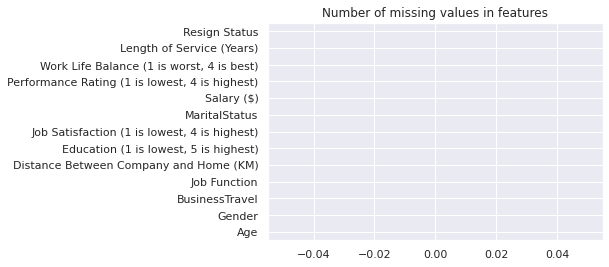

In [7]:
emDf.isna().sum().sort_values().plot.barh(title='Number of missing values in features')

### Quantitative Variables


In [8]:
quantitativeVariables=['Age','Distance Between Company and Home (KM)','Education (1 is lowest, 5 is highest)','Job Satisfaction (1 is lowest, 4 is highest)','Salary ($)','Performance Rating (1 is lowest, 4 is highest)','Work Life Balance (1 is worst, 4 is best)','Length of Service (Years)']

### Qualitative Variables


In [9]:
qualitativeVariables=['Gender', 'BusinessTravel','Job Function','Resign Status','MaritalStatus']

### Univariate Analysis

In [10]:
emDf[quantitativeVariables].describe()

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years)
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.728571,6502.931293,3.153741,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.102846,4707.956783,0.360824,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1009.000000,3.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2911.000000,3.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,4919.000000,3.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,8379.000000,3.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,19999.000000,4.000000,4.000000,40.000000


In [11]:
emDf[qualitativeVariables].describe()

,Gender,BusinessTravel,Job Function,Resign Status,MaritalStatus
count,1470,1470,1470,1470,1470
unique,2,3,3,2,3
top,Male,Travel_Rarely,Research & Development,No,Married
freq,882,1043,961,1233,673


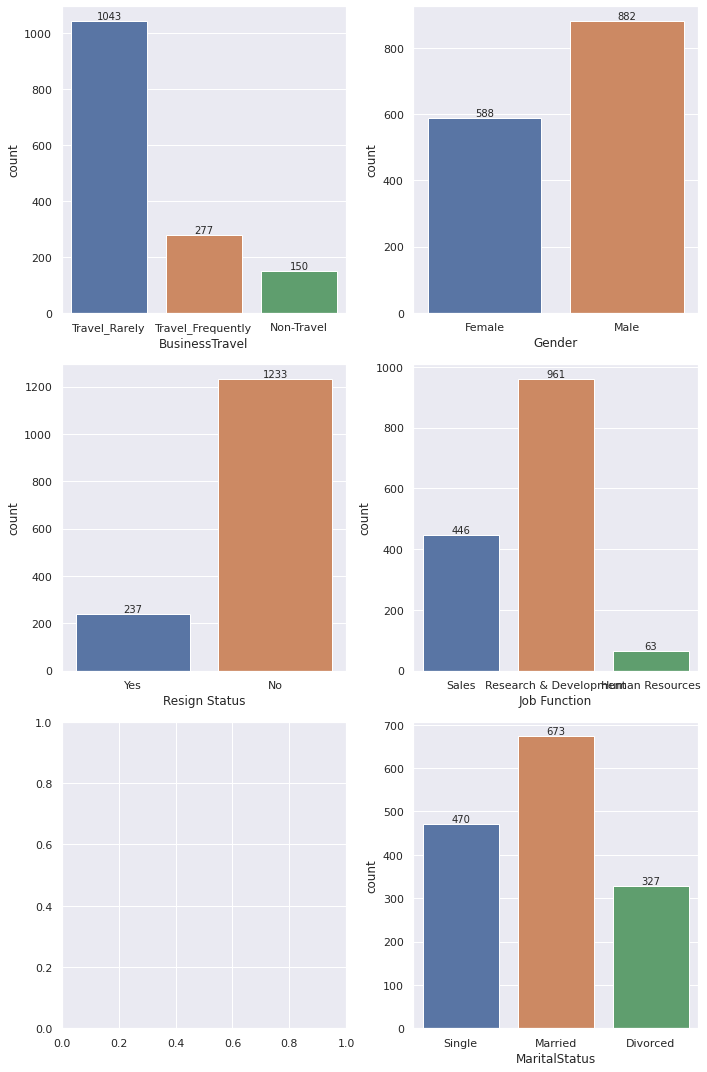

In [12]:
fig, ax = plt.subplots(int(np.ceil(len(qualitativeVariables)/2)), 2, figsize=(10, 15), tight_layout=True)
for i,y in enumerate(qualitativeVariables):
    n=1 if i%2==0 else 0
    g=sns.countplot(x=y,data=emDf,ax=ax[int(np.floor(i/2)),n])
    g.bar_label(g.containers[0])
fig.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Distance Between Company and Home (KM)'}>,
        <AxesSubplot:title={'center':'Education (1 is lowest, 5 is highest)'}>],
       [<AxesSubplot:title={'center':'Job Satisfaction (1 is lowest, 4 is highest)'}>,
        <AxesSubplot:title={'center':'Salary ($)'}>,
        <AxesSubplot:title={'center':'Performance Rating (1 is lowest, 4 is highest)'}>],
       [<AxesSubplot:title={'center':'Work Life Balance (1 is worst, 4 is best)'}>,
        <AxesSubplot:title={'center':'Length of Service (Years)'}>,
        <AxesSubplot:>]], dtype=object)

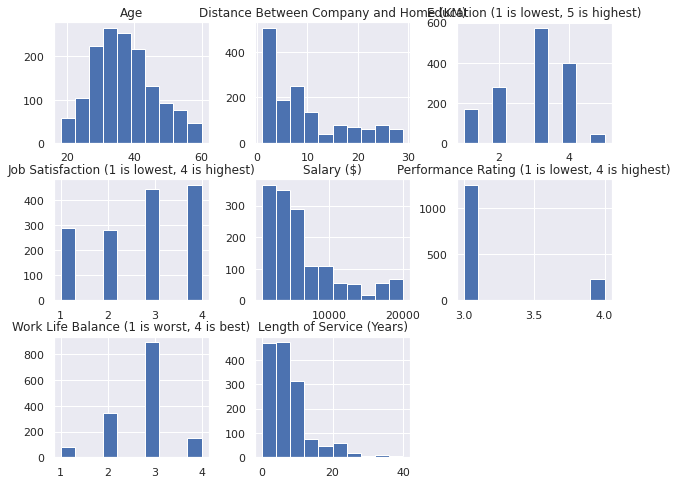

In [13]:
emDf[quantitativeVariables].hist(figsize=(10, 8))

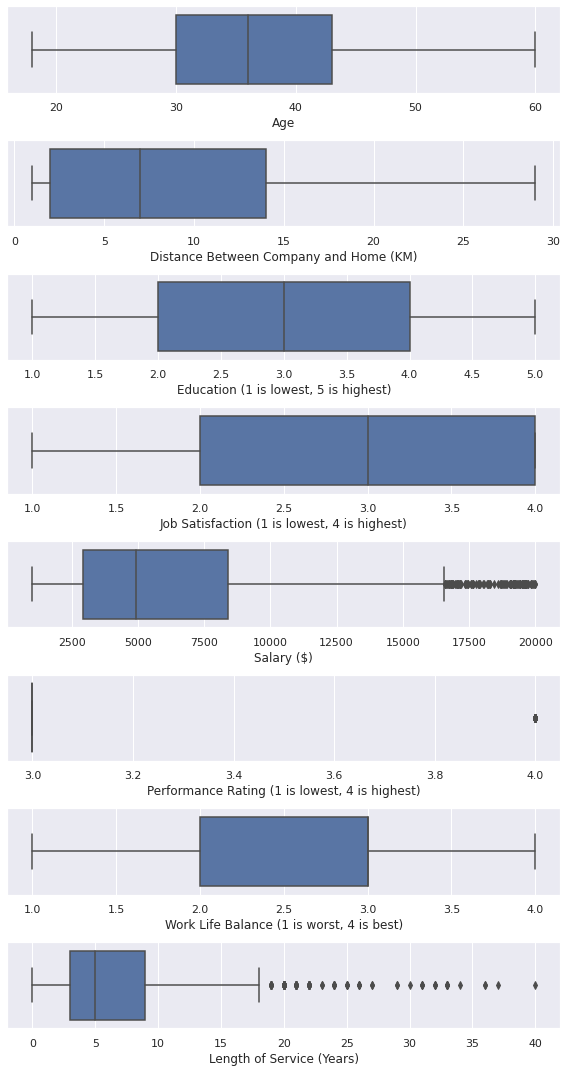

In [14]:
fig, ax = plt.subplots(len(quantitativeVariables), 1, figsize=(8, 15), tight_layout=True)
for idx, feature in enumerate(quantitativeVariables):
    sns.boxplot(data=emDf, x=feature, ax = ax[idx])
fig.show()

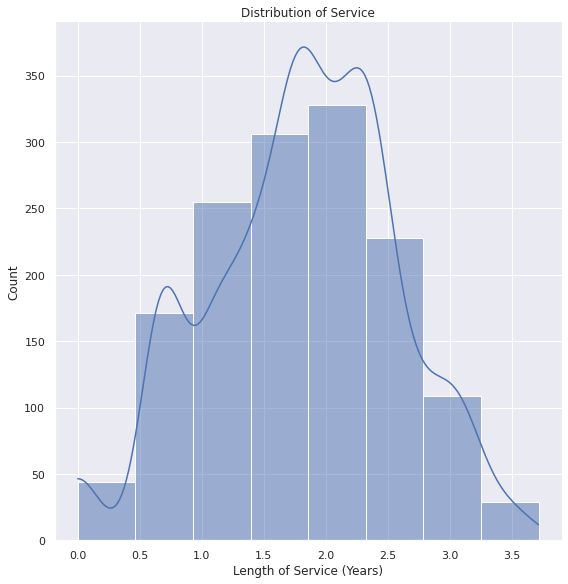

In [15]:
sns.displot(emDf["Length of Service (Years)"].map(np.log1p), kde=True, height = 8,bins=8)
plt.title("Distribution of Service")
plt.show()

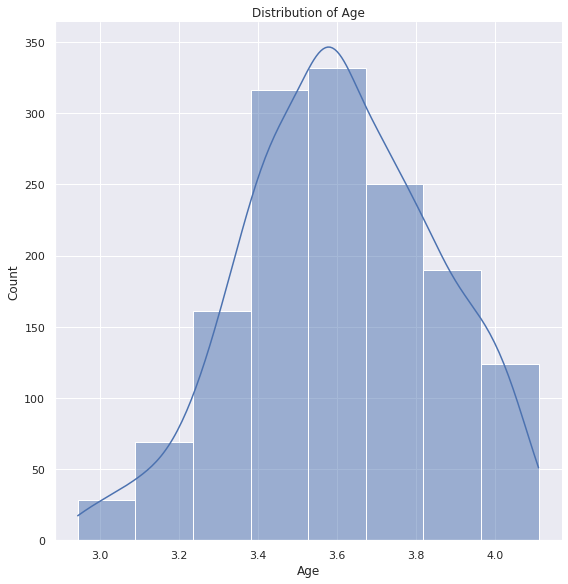

In [16]:

sns.displot(emDf["Age"].map(np.log1p), kde=True, height = 8,bins=8)
plt.title("Distribution of Age")
plt.show()

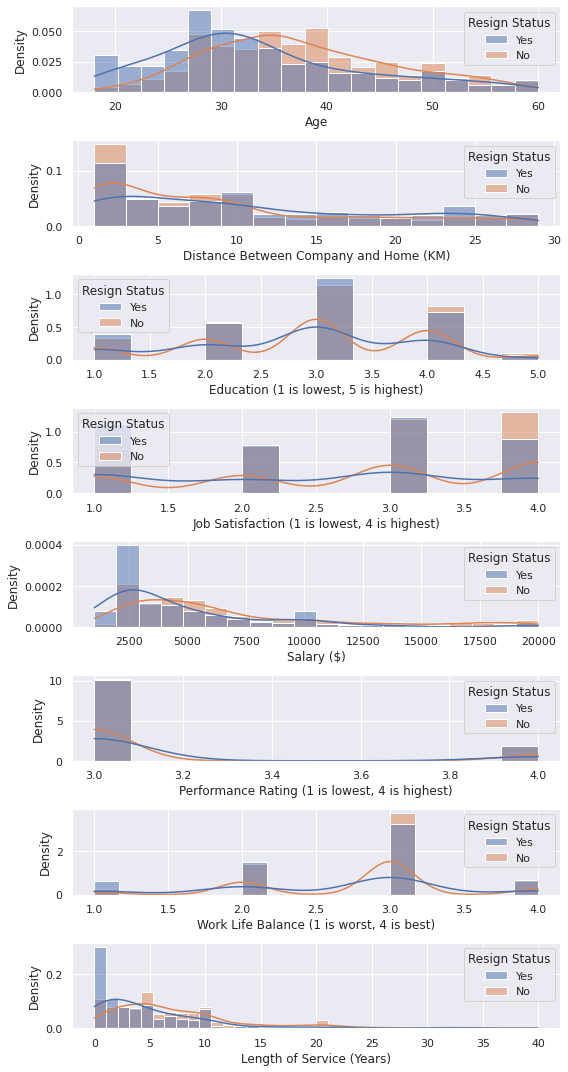

In [17]:
fig, ax = plt.subplots(len(quantitativeVariables), 1, figsize=(8, 15), tight_layout=True)
for idx, feature in enumerate(quantitativeVariables):

    sns.histplot(data=emDf,common_norm = False,stat='density', x=feature, hue="Resign Status",ax=ax[idx],kde=True)
fig.show()

In [18]:
def ratioPlot(data,target,correspond,label):
    while (correspond in target):
        print('Warning: Found target label in array. Ignoring...')
        target.remove(correspond)
    fig, ax = plt.subplots(len(target), 1, figsize=(8, 8), tight_layout=True)

    for idx, feature in enumerate(target):
        unique=data[feature].unique()
        start=[]
        for option in unique:
            start.append(np.sum(data[data[correspond]==label][feature]==option)/np.sum(data[feature]==option))
        qualityPercentage=pd.DataFrame({feature:unique,'Percentage':start})
        if (len(target)==1):
             sns.barplot(data=qualityPercentage,x=feature,y='Percentage',ax=ax)
        else:
                sns.barplot(data=qualityPercentage,x=feature,y='Percentage',ax=ax[idx])
            
       
    return fig.show()
        

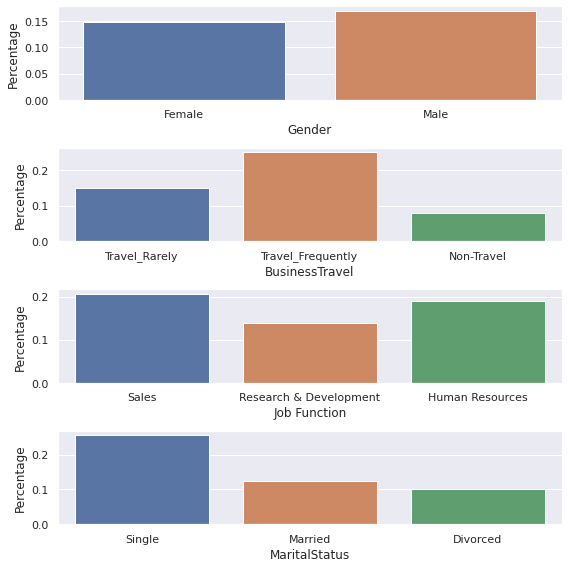

In [19]:
ratioPlot(emDf,qualitativeVariables,'Resign Status','Yes')

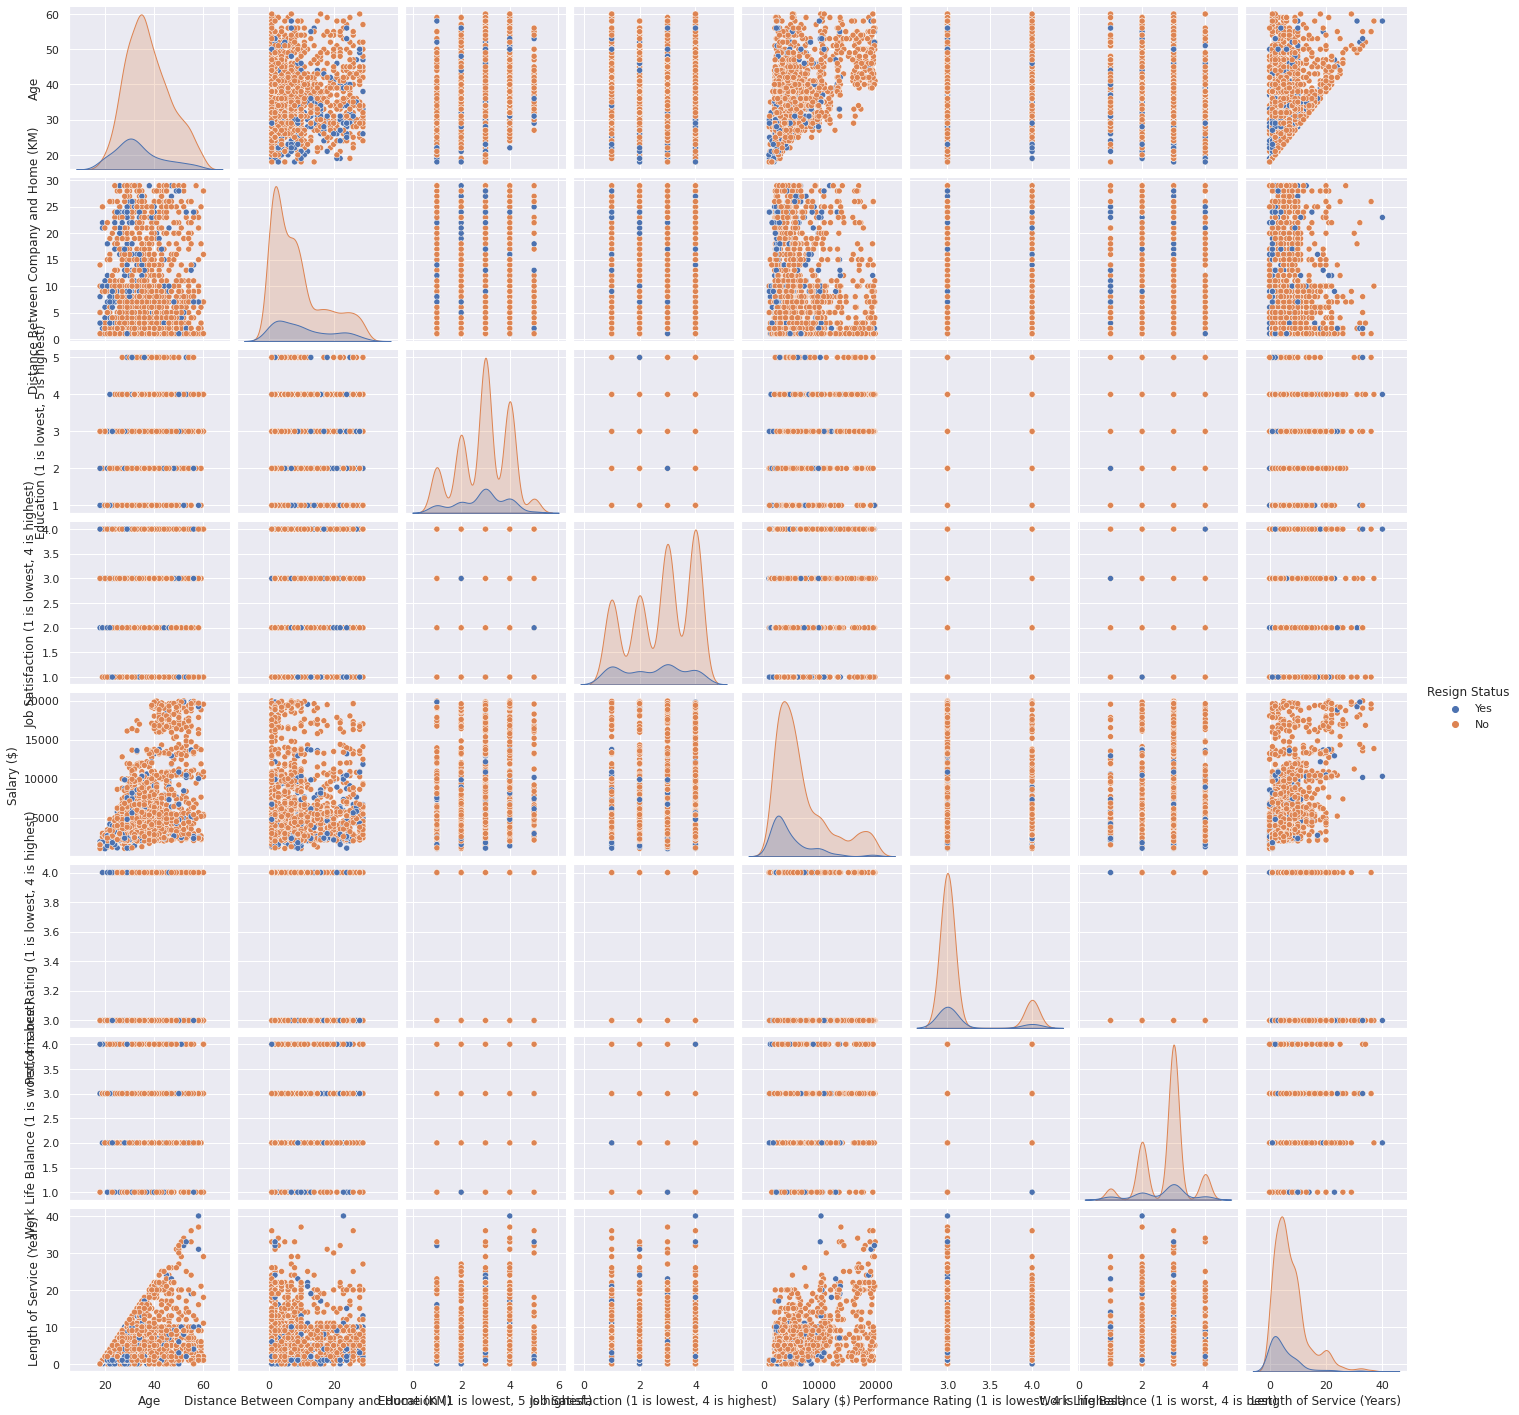

In [20]:
sns.pairplot(emDf, hue="Resign Status")

interval columns not set, guessing: ['Age', 'Distance Between Company and Home (KM)', 'Education (1 is lowest, 5 is highest)', 'Job Satisfaction (1 is lowest, 4 is highest)', 'Salary ($)', 'Performance Rating (1 is lowest, 4 is highest)', 'Work Life Balance (1 is worst, 4 is best)', 'Length of Service (Years)']


Text(0.5, 1.0, 'Correlation Matrix')

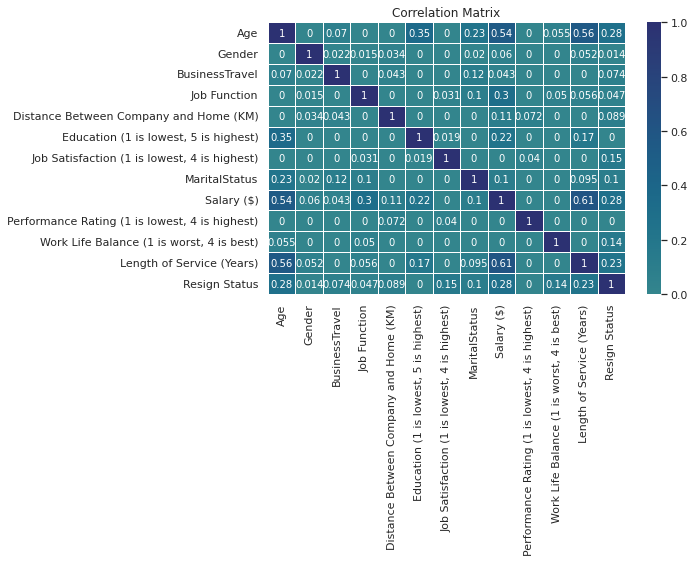

In [21]:
corr_matrix = emDf.phik_matrix()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix, annot = True, linewidths=.5,center = 0,cmap="crest",ax=ax).set_title('Correlation Matrix')

## Data Preprocessing

In [22]:
logTransformer=ColumnTransformer([
    ('Log Transformer',FunctionTransformer(np.log1p),['Length of Service (Years)','Age'])
])

In [23]:
quantitativeTransformer=Pipeline([
     ('Normaliser', RobustScaler())
])
categorical_transformers = Pipeline([
    ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'))
])
data_preprocessing = ColumnTransformer([
    ('Preprocess Numerical Features', quantitativeTransformer, quantitativeVariables),
       ('Preprocess Categorical Features', categorical_transformers, qualitativeVariables)
])

### Feature Selection

In [24]:
data_preprocessing.fit(emDf)

featurelist=np.concatenate((quantitativeVariables, data_preprocessing.transformers_[1][1]['One Hot Encoder'].get_feature_names()))
featurelist

/home/hanhan8808882/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Age', 'Distance Between Company and Home (KM)',
       'Education (1 is lowest, 5 is highest)',
       'Job Satisfaction (1 is lowest, 4 is highest)', 'Salary ($)',
       'Performance Rating (1 is lowest, 4 is highest)',
       'Work Life Balance (1 is worst, 4 is best)',
       'Length of Service (Years)', 'x0_Female', 'x0_Male',
       'x1_Non-Travel', 'x1_Travel_Frequently', 'x1_Travel_Rarely',
       'x2_Human Resources', 'x2_Research & Development', 'x2_Sales',
       'x3_Divorced', 'x3_Married', 'x3_Single'], dtype=object)

In [25]:
from skfeature.utility import construct_W
  
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
  
W = construct_W.construct_W(data_preprocessing.fit_transform(emDf), **kwargs_W)



from skfeature.function.similarity_based import lap_score

   
score = lap_score.lap_score(data_preprocessing.fit_transform(emDf), W=W)

   
print(score)
 
idx = lap_score.feature_ranking(score)




[0.1716642  0.18115905 0.3111418  0.25199014 0.10132164 0.34116751
 0.19318287 0.10274006 0.02360639 0.02360639 0.14494801 0.07243701
 0.08108088 0.26589756 0.05033826 0.0370669  0.04729974 0.03382689
 0.03688046]


In [61]:
pd.DataFrame({'Feature':featurelist,'Lap Score':score})

,Feature,Lap Score
0,Age,0.171664
1,Distance Between Company and Home (KM),0.181159
2,"Education (1 is lowest, 5 is highest)",0.311142
3,"Job Satisfaction (1 is lowest, 4 is highest)",0.251990
4,Salary ($),0.101322
5,"Performance Rating (1 is lowest, 4 is highest)",0.341168
6,"Work Life Balance (1 is worst, 4 is best)",0.193183
7,Length of Service (Years),0.102740
8,x0_Female,0.023606
9,x0_Male,0.023606


In [184]:
maxcomponent=np.arange(2,19)
maxvalue=[]
maxdavi=[]
for i in range(2,19):
    print(i)
    silhouette_avg = []
    davi_avg=[]
    x=data_preprocessing.fit_transform(emDf)[:, idx[-i:]]
    for num_clusters in range(2,10):
 
     # initialise kmeans
         
         kmeans = KMeans(n_clusters=num_clusters)
         kmeans.fit(pd.DataFrame(x))
         cluster_labels = kmeans.labels_
         silhouette_avg.append(silhouette_score(x, cluster_labels))
         davi_avg.append(davies_bouldin_score(x, cluster_labels))

    maxvalue.append(max(silhouette_avg))
    maxdavi.append(min(davi_avg))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/tmp/ipykernel_2346290/477756472.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(maxcomponent,maxvalue,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2346290/477756472.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(maxcomponent,maxdavi,'bx-',color='red',label='Davies Bouldin')


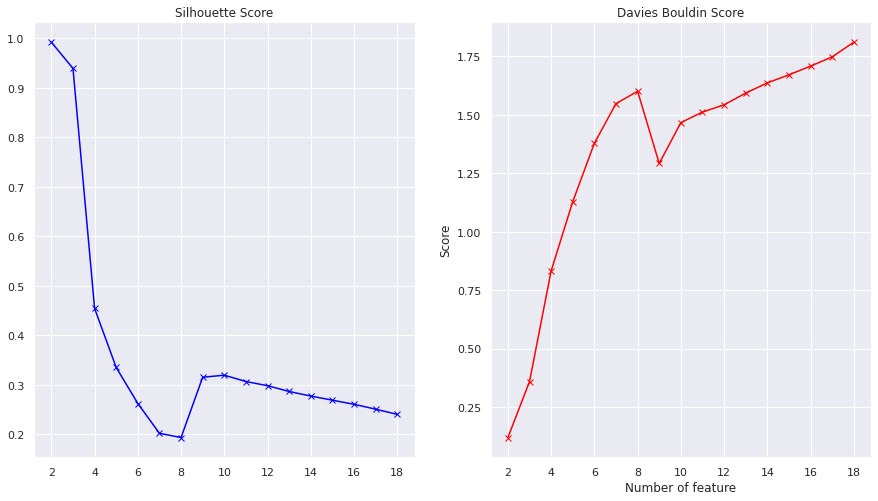

In [185]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
maxcomponent=np.arange(2,19)
ax1.plot(maxcomponent,maxvalue,'bx-',color='blue',label='Silhouette')
ax1.set_title('Silhouette Score')
ax2.plot(maxcomponent,maxdavi,'bx-',color='red',label='Davies Bouldin')
ax2.set_title('Davies Bouldin Score')
plt.xlabel('Number of feature') 
plt.ylabel('Score') 
# fig.title('Laplacian Scores Feature Selection')
plt.show()

### Dimensionality Reduction

In [221]:
#  from sklearn.decomposition import PCA
# pca = PCA(n_components=0.98)
# x=pd.DataFrame(pca.fit_transform(data_preprocessing.fit_transform(emDf)))
# x=data_preprocessing.fit_transform(emDf)
x=data_preprocessing.fit_transform(emDf)[:, idx[-3:]]



## Model and Evaluation

In [263]:
def algorithm(algo,name='cluster',x='None'):
    al = algo
    result=al.fit_predict(x)
    return result,al

In [264]:
def evaluateCluster(x,labels,algName='Undefined testing',record=pd.DataFrame({'name':[],'silihouette_score':[],'davies_bouldin_score':[]})):
    '''
    This function is used for model evaluation . 
    '''
    current=pd.DataFrame({'name':[algName],'silihouette_score':[silhouette_score(x,labels)],'davies_bouldin_score':[davies_bouldin_score(x,labels)],})
    record=pd.concat([record,current],ignore_index=True)
    display(skplt.metrics.plot_silhouette(x,labels))
    return current,record

In [265]:
def GridSearchForK(x=None,start=2,end=15,algorithm=SpectralClustering):
    x=x.copy()
    silhouette_avg = []
    davies_avg=[]
    rangeSearch=range(start,end)
    for num_clusters in rangeSearch:
 
     
        sci = algorithm(n_clusters=num_clusters)
        if (hasattr(algorithm(),'random_state')):
            sci = algorithm(n_clusters=num_clusters,random_state=42)
        sci.fit(x)
        cluster_labels = sci.labels_
 
    # silhouette score
        davies_avg.append(davies_bouldin_score(x, cluster_labels))
        silhouette_avg.append(silhouette_score(x, cluster_labels))
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))   
    ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
    ax1.set_title('Silhouette Score')
    ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')
    ax2.set_title('Davies Bouldin Score')
    plt.xlabel('Values of K') 
    return fig.show()
    

### K means

In [288]:
def k_cluster(x):
    fig, ax = plt.subplots(figsize=(10,5))

    inertia = []
    for no_cluster in range(1,11):
        model = KMeans(n_clusters=no_cluster,init="k-means++",max_iter=100)
        clusters = model.fit_predict(x)
        print('loop '+str(no_cluster))
        inertia.append(model.inertia_)
    ax.plot(list(range(1, 11)), inertia, 'o-')  
    ax.set_title("Elbow Plot")
    ax.set_ylabel('Inertia')
    ax.set_xlabel('No of Clusters')
    return fig.show()

loop 1
loop 2
loop 3
loop 4
loop 5
loop 6
loop 7
loop 8
loop 9
loop 10


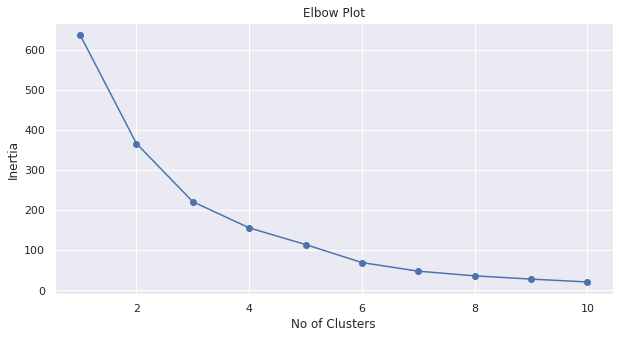

In [289]:
k_cluster(x)

In [268]:
def getCluster(dfCopy,clusters):
    df=dfCopy.copy()
    df['cluster']=clusters
    cluster_centers = df.groupby('cluster').mean()
    cluster_centers['cluster size'] = pd.Series(df['cluster']).value_counts() / len(df['cluster']) * 100
    return cluster_centers,df


In [269]:
result,km=algorithm(KMeans(n_clusters=9,init="k-means++",max_iter=100),'cluster',x)
evaluation,kmDf=getCluster(emDf,result)
evaluation

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),cluster size
cluster,,,,,,,,,
0,36.607296,9.296137,3.000000,2.678112,6552.534335,3.000000,2.718884,6.875536,31.700680
1,35.115385,9.589744,1.615385,2.743590,5985.371795,4.000000,2.743590,6.935897,5.306122
2,31.971429,8.257143,1.000000,2.778571,5629.285714,3.000000,2.778571,6.235714,9.523810
3,40.757576,10.348485,4.136364,2.954545,6879.696970,4.000000,2.803030,8.303030,4.489796
4,38.984756,8.832317,4.000000,2.753049,6819.259146,3.000000,2.783537,7.478659,22.312925
5,37.053812,9.493274,2.000000,2.802691,6363.820628,3.000000,2.766816,6.686099,15.170068
6,37.833333,8.740741,3.148148,2.555556,6721.777778,3.055556,2.925926,7.444444,3.673469
7,35.620253,9.493671,3.000000,2.556962,6226.063291,4.000000,2.721519,6.215190,5.374150
8,39.083333,9.944444,5.000000,2.694444,7947.916667,3.000000,2.805556,8.305556,2.448980


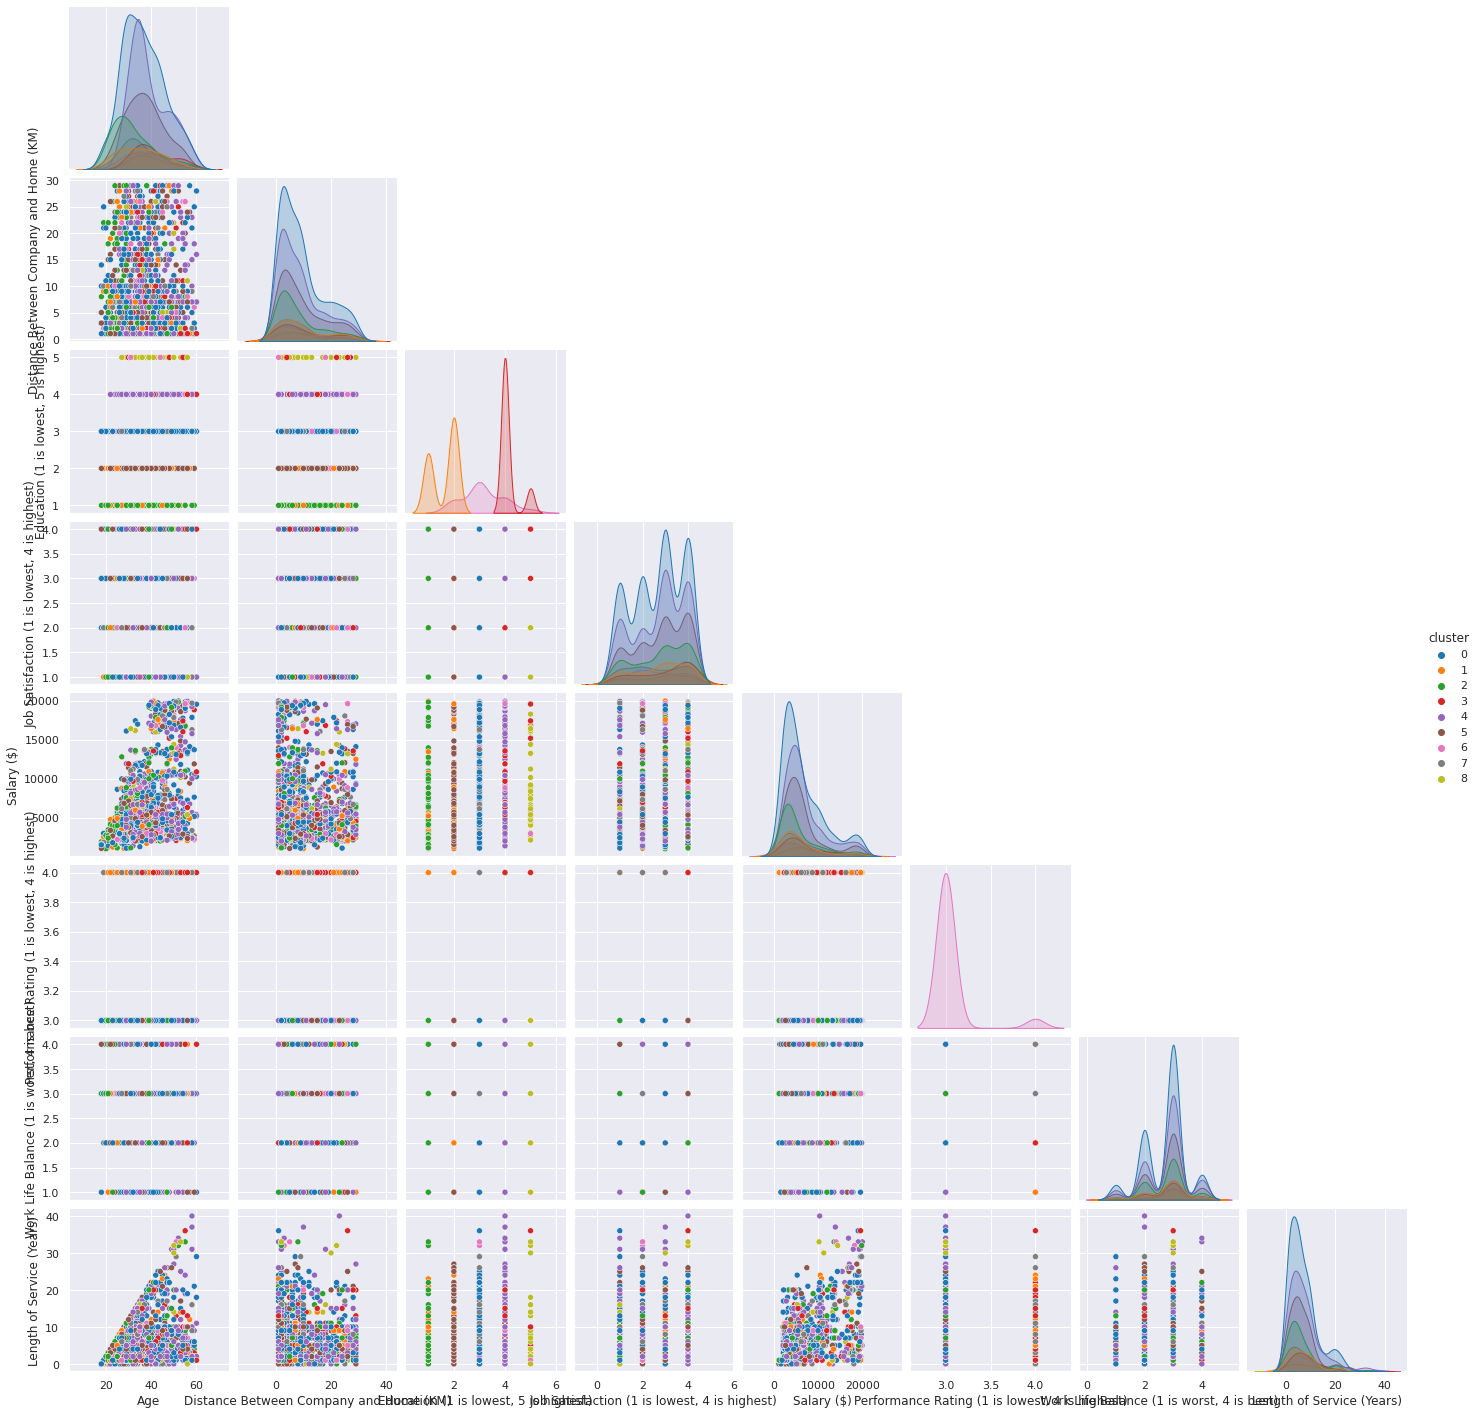

In [270]:
sns.pairplot(kmDf, hue='cluster', corner=True, palette="tab10")

/tmp/ipykernel_2346290/1641216681.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2346290/1641216681.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


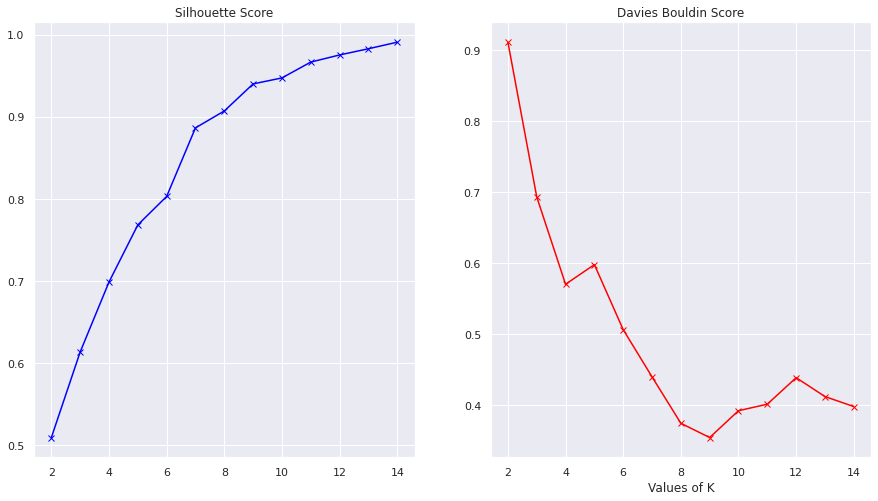

In [271]:
GridSearchForK(x,2,15,KMeans)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

,name,silihouette_score,davies_bouldin_score
0,KMeans++,0.939909,0.35482


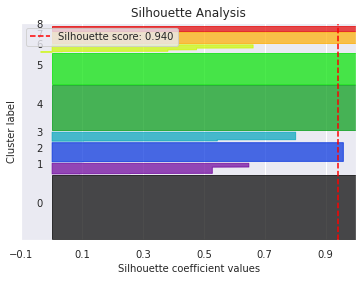

In [272]:
current,record=evaluateCluster(x,result,'KMeans++')
current

In [273]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


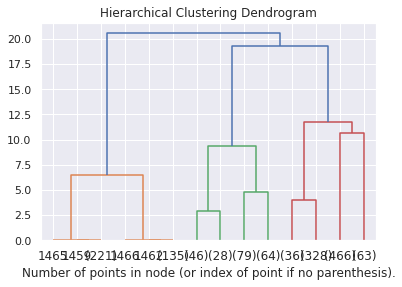

In [274]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(x)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [275]:
result,hiera=algorithm(AgglomerativeClustering(n_clusters=14),'cluster',x)
evaluation,hiDf=getCluster(emDf,result)
evaluation

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),cluster size
cluster,,,,,,,,,
0,40.531250,10.546875,4.140625,2.968750,6767.859375,4.0,2.796875,8.468750,4.353741
1,41.562500,12.875000,4.187500,2.625000,8732.562500,3.0,2.937500,6.875000,1.088435
2,41.400000,4.200000,3.400000,2.400000,7015.800000,4.0,3.400000,4.200000,0.340136
3,31.978102,8.218978,1.000000,2.781022,5701.058394,3.0,2.773723,6.335766,9.319728
4,34.285714,6.500000,1.785714,2.642857,3412.500000,3.0,2.928571,4.857143,0.952381
5,33.214286,10.821429,1.000000,2.857143,5856.035714,4.0,2.785714,7.571429,1.904762
6,37.000000,9.500000,1.500000,3.250000,7071.500000,4.0,2.750000,10.750000,0.272109
7,35.620253,9.493671,3.000000,2.556962,6226.063291,4.0,2.721519,6.215190,5.374150
8,38.984756,8.832317,4.000000,2.753049,6819.259146,3.0,2.783537,7.478659,22.312925


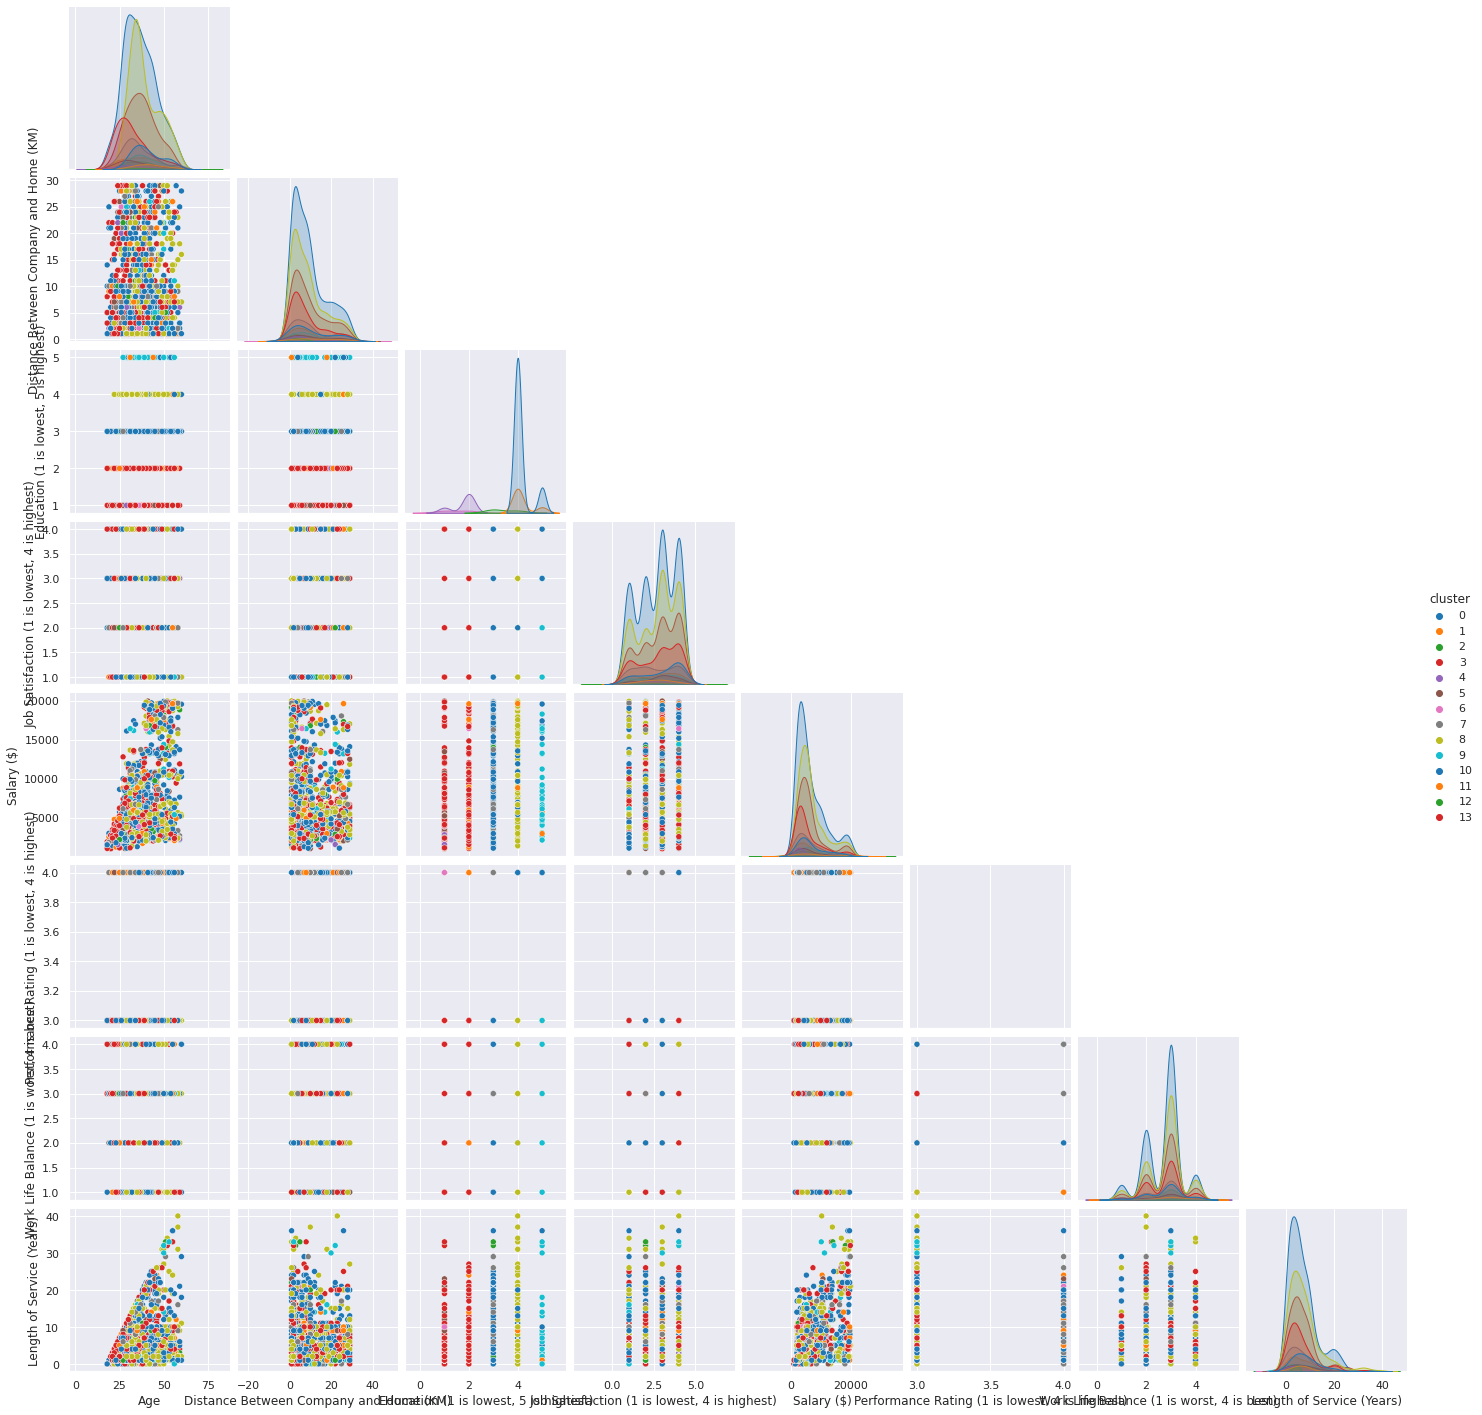

In [276]:
sns.pairplot(hiDf, hue='cluster', corner=True, palette="tab10")

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

,name,silihouette_score,davies_bouldin_score
0,Hierarchical Clustering,0.984456,0.284059


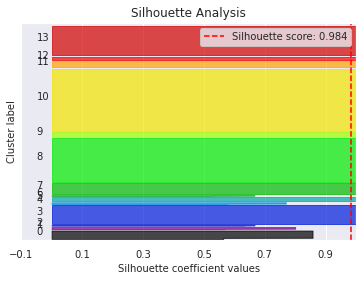

In [277]:

current,record=evaluateCluster(x,result,'Hierarchical Clustering',record)
current

/tmp/ipykernel_2346290/1641216681.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2346290/1641216681.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


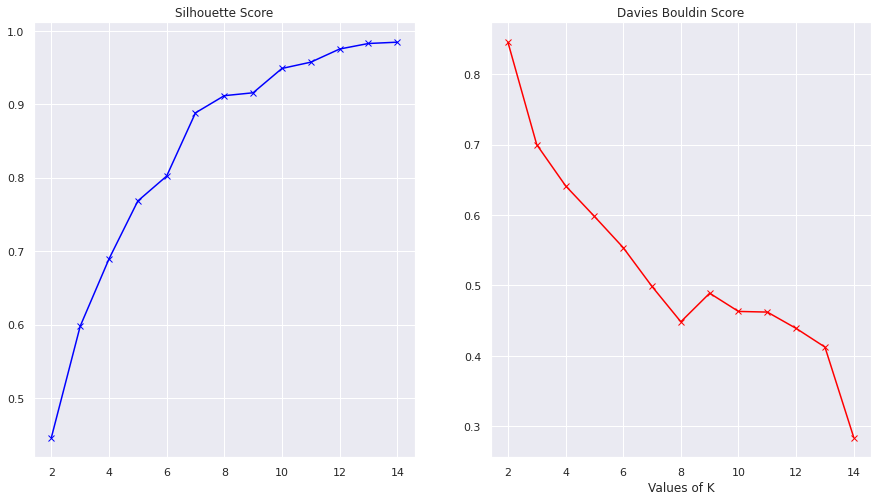

In [278]:
GridSearchForK(x,2,15,AgglomerativeClustering)

In [279]:

def elbatta_eps(X):
    distances, indices = NearestNeighbors(n_neighbors=3).fit(X).kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(distances)
    ax.set_title("Elbatta's EPs Plot")
    ax.set_ylabel('eps')
    return fig.show()

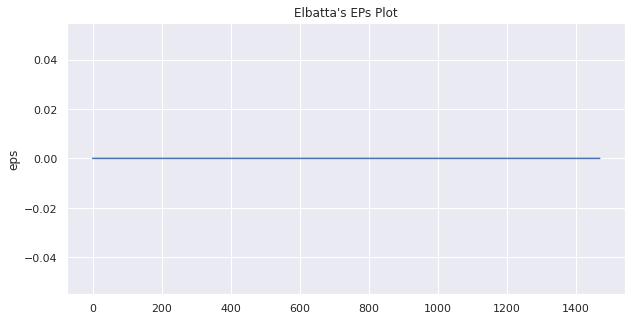

In [280]:
elbatta_eps(x)

In [281]:

result,dbscan=algorithm(DBSCAN(eps=0.1),'cluster',x)
evaluation,dbDf=getCluster(emDf,result)
evaluation

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),cluster size
cluster,,,,,,,,,
-1,37.800000,7.333333,2.733333,2.600000,5692.733333,3.6,3.133333,5.600000,1.020408
0,37.053812,9.493274,2.000000,2.802691,6363.820628,3.0,2.766816,6.686099,15.170068
1,33.214286,10.821429,1.000000,2.857143,5856.035714,4.0,2.785714,7.571429,1.904762
2,38.984756,8.832317,4.000000,2.753049,6819.259146,3.0,2.783537,7.478659,22.312925
3,31.978102,8.218978,1.000000,2.781022,5701.058394,3.0,2.773723,6.335766,9.319728
4,35.620253,9.493671,3.000000,2.556962,6226.063291,4.0,2.721519,6.215190,5.374150
5,36.607296,9.296137,3.000000,2.678112,6552.534335,3.0,2.718884,6.875536,31.700680
6,40.054545,10.000000,4.000000,3.000000,6125.672727,4.0,2.818182,8.272727,3.741497
7,36.108696,8.847826,2.000000,2.630435,5969.652174,4.0,2.717391,6.217391,3.129252


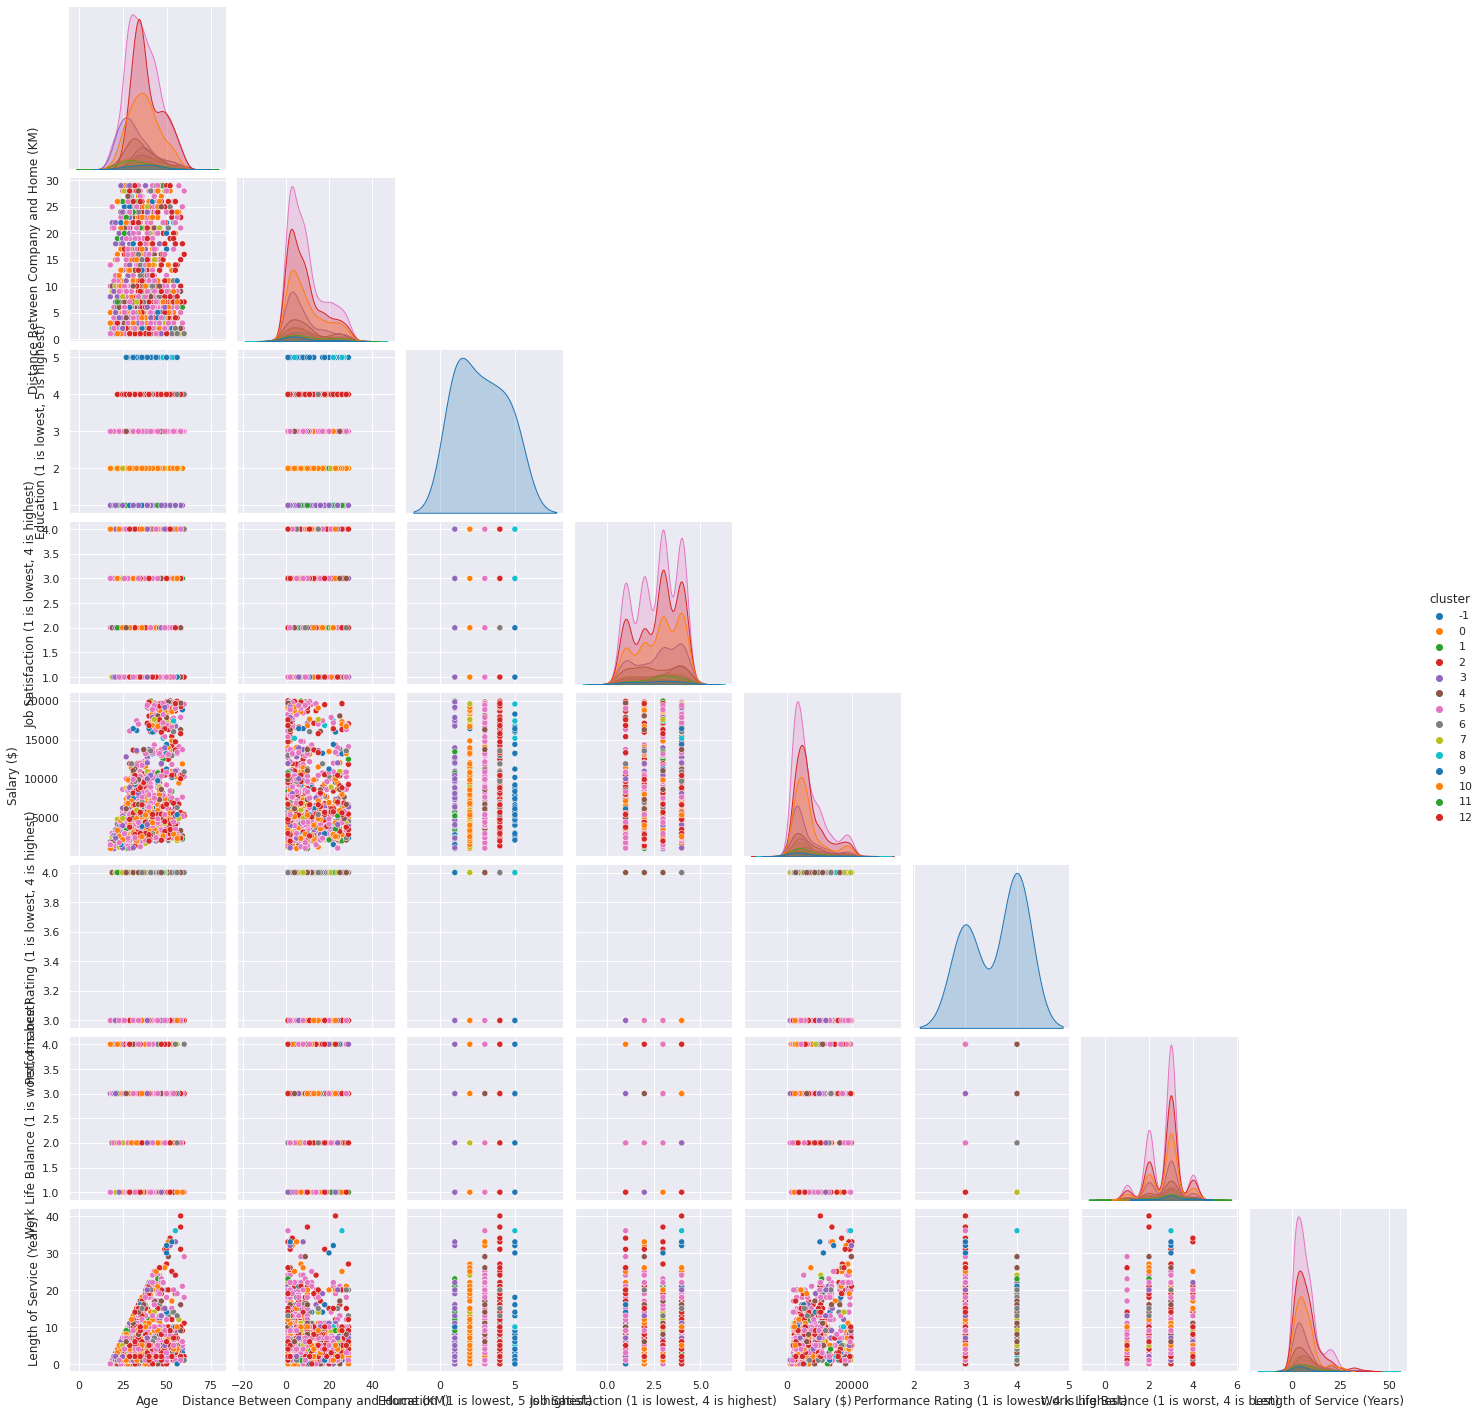

In [282]:
sns.pairplot(dbDf, hue='cluster', corner=True, palette="tab10")

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

,name,silihouette_score,davies_bouldin_score
0,DBSCAN,0.987159,0.82149


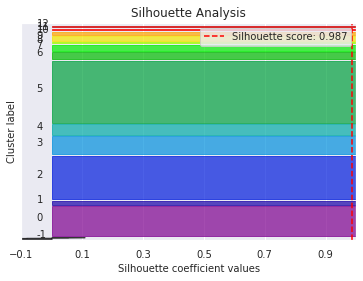

In [283]:
current,record=evaluateCluster(x,result,'DBSCAN',record)
current

In [284]:
result,spclust=algorithm(SpectralClustering(n_clusters=14),'cluster',x)
evaluation,scDf=getCluster(emDf,result)
evaluation

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),cluster size
cluster,,,,,,,,,
0,36.464220,9.324771,3.000000,2.660550,6505.211009,3.144954,2.719266,6.779817,37.074830
1,41.400000,4.200000,3.400000,2.400000,7015.800000,4.000000,3.400000,4.200000,0.340136
2,43.444444,13.888889,5.000000,2.777778,10692.333333,4.000000,2.666667,9.666667,0.612245
3,33.214286,10.821429,1.000000,2.857143,5856.035714,4.000000,2.785714,7.571429,1.904762
4,31.978102,8.218978,1.000000,2.781022,5701.058394,3.000000,2.773723,6.335766,9.319728
5,41.562500,12.875000,4.187500,2.625000,8732.562500,3.000000,2.937500,6.875000,1.088435
6,37.000000,9.500000,1.500000,3.250000,7071.500000,4.000000,2.750000,10.750000,0.272109
7,34.285714,6.500000,1.785714,2.642857,3412.500000,3.000000,2.928571,4.857143,0.952381
8,36.750000,8.000000,3.000000,2.500000,7015.541667,3.000000,2.833333,8.916667,1.632653


<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

,name,silihouette_score,davies_bouldin_score
0,Spectral Clustering,0.824278,0.352765


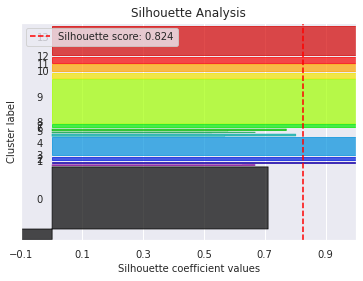

In [285]:
current,record=evaluateCluster(x,result,'Spectral Clustering',record)
current

/tmp/ipykernel_2346290/1641216681.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(rangeSearch,silhouette_avg,'bx-',color='blue',label='Silhouette')
/tmp/ipykernel_2346290/1641216681.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(rangeSearch,davies_avg,'bx-',color='red',label='Davies Bouldin')


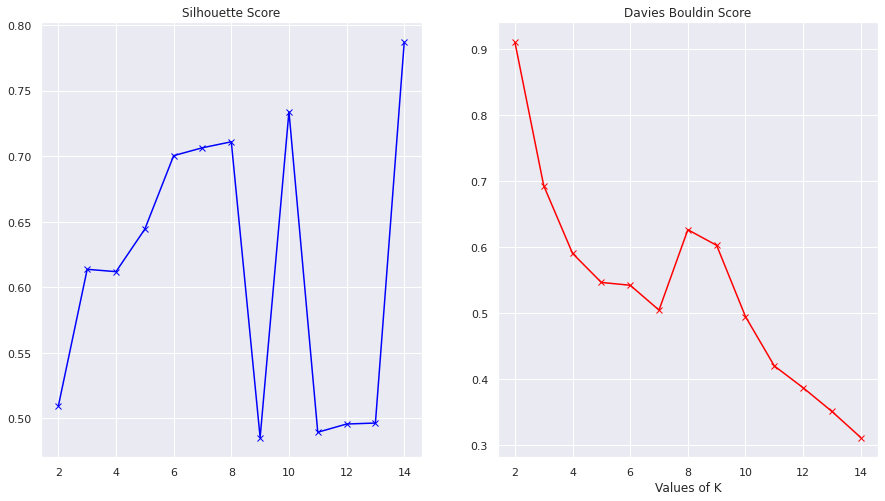

In [286]:
GridSearchForK(x,2,15,SpectralClustering)

In [287]:
record

,name,silihouette_score,davies_bouldin_score
0,KMeans++,0.939909,0.354820
1,Hierarchical Clustering,0.984456,0.284059
2,DBSCAN,0.987159,0.821490
3,Spectral Clustering,0.824278,0.352765
